# BigMart Project
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#h">Hypothesis Generation</a></li>
<li><a href="#i">Import Packages and Loading Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#u">Univariate Exploration</a></li>
<li><a href="#b">Bivariate Exploration</a></li>
<li><a href="#m">Missing Value Treatment</a></li>
<li><a href="#o">Outliers Removal</a></li>
<li><a href="#f">Feature Engineering</a></li>
<li><a href="#e">Encoding</a></li>
<li><a href="#s">Scaling</a></li>
<li><a href="#sp">Splitting</a></li>
<li><a href="#mo">Model</a></li>

</ul>

<a id='intro'></a>
## Introduction

### Project Description 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.<br>
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

<a id='h'></a>
## Hypothesis Generation

#### 1. ITEM TYPE
Item type holds a lot of significance in determining its price. Price differs by supply and demand which differs in item type.
#### 2. ITEM SIZE
People with stores far away tends to buy large size items to decrease the times of shopping.This will get us to the third feature.
#### 3. STORE PLACE 
Store place is a great factor also. It determines the class of the buyers and what type of profducts they are interested in.
#### 4. OUTLET PLACE
High class people tend to buy imported products more than lower classes.
#### 5. RETAIL PRICE
I think this is one of the greatest factors of determining a product's sale.

<a id='i'></a>
## Import Packages & Loading Data

In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew, norm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


<a id='eda'></a>
## Exploratory Data Analysis

In [3]:
data.shape

(14204, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

<a id='b'></a>
### Univariate Exploration


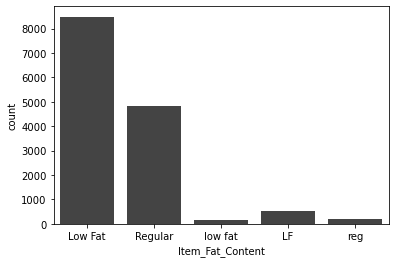

In [7]:
sb.countplot(data=data, x='Item_Fat_Content',color='#444444');
plt.show()

> As shown, low fat and regular have a lot of values so let us combine them.

In [8]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('low fat','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('LF','Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

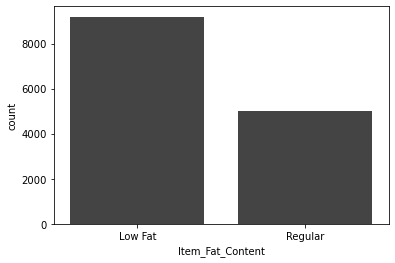

In [9]:
sb.countplot(data=data, x='Item_Fat_Content',color='#444444');
plt.show()

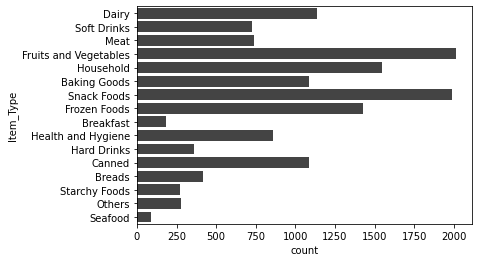

In [10]:
sb.countplot(data=data, y='Item_Type',color='#444444');
plt.show()

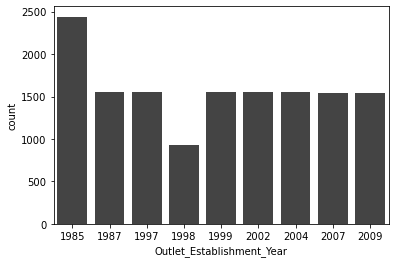

In [11]:
sb.countplot(data=data, x='Outlet_Establishment_Year',color='#444444');
plt.show()

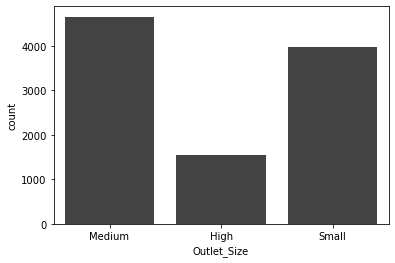

In [12]:
sb.countplot(data=data, x='Outlet_Size',color='#444444');
plt.show()

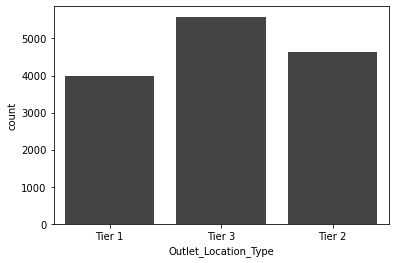

In [13]:
sb.countplot(data=data, x='Outlet_Location_Type',color='#444444');
plt.show()

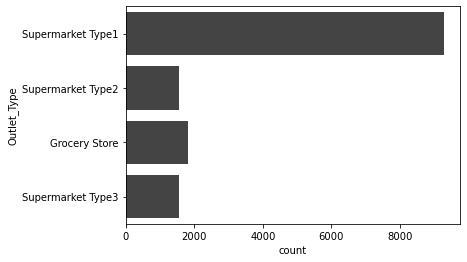

In [14]:
sb.countplot(data=data, y='Outlet_Type',color='#444444');
plt.show()

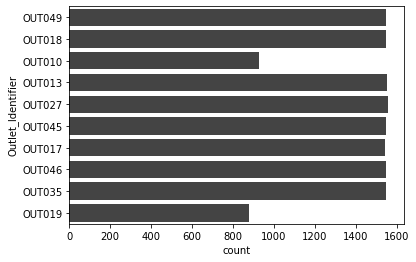

In [15]:
sb.countplot(data=data, y='Outlet_Identifier',color='#444444');
plt.show()

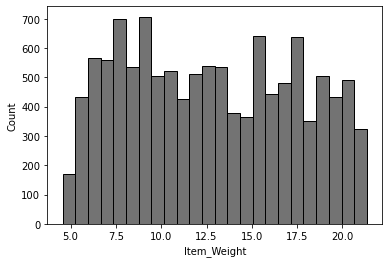

In [16]:
sb.histplot(x=data['Item_Weight'],color='#444444')
plt.show()

Text(0.5, 1.0, 'Violinplot of weights')

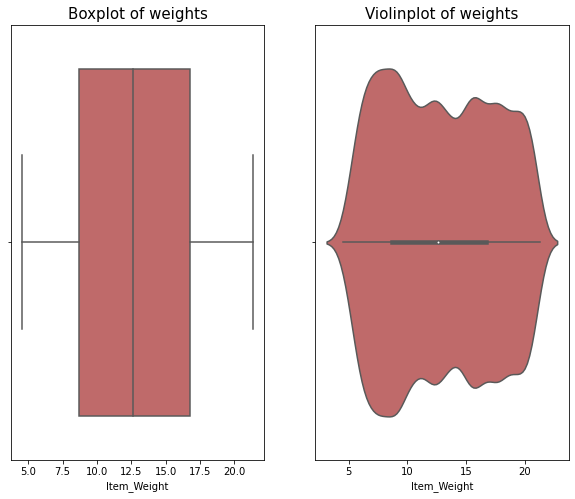

In [17]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sb.boxplot(x = data['Item_Weight'],ax=ax1,color='indianred')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sb.violinplot(x = data['Item_Weight'],ax=ax2,color='indianred')
ax2.set_title('Violinplot of weights',size=15)

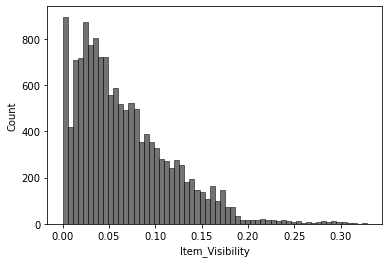

In [18]:
sb.histplot(x=data['Item_Visibility'],color='#444444')
plt.show()

> We can see that this a rightly skewed distribution. We could transform it later.

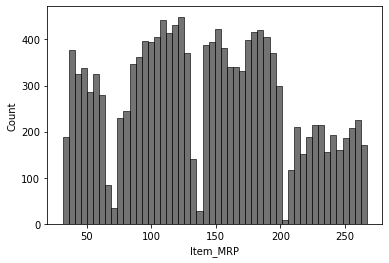

In [19]:
sb.histplot(x=data['Item_MRP'],color='#444444', bins = 50)
plt.show()

> It is visible that the data is clustered into four clusters. We could use that in feature engineering.

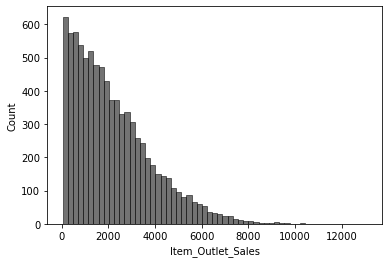

In [20]:
sb.histplot(x=data['Item_Outlet_Sales'],color='#444444')
plt.show()

> Our target is also skewed to the right

<a id='b'></a>
## Bivariate Exploration

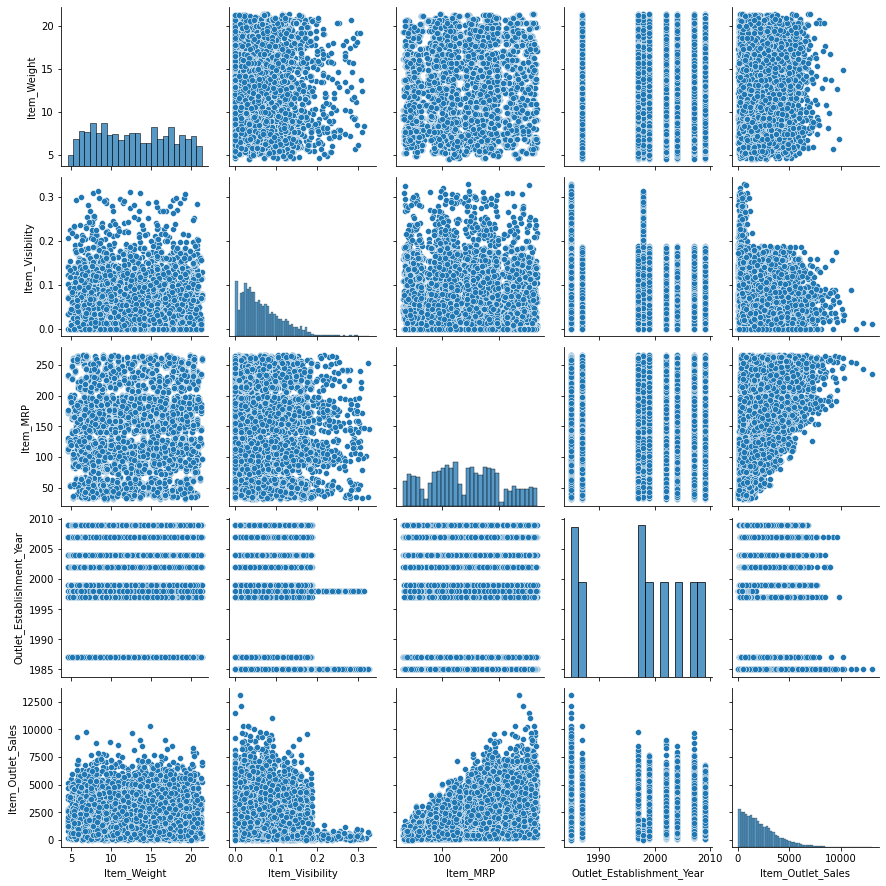

In [21]:
sb.pairplot(data)

>We could infer some points: 
> 1. Item_Visibility is inversely proportional to the sales
> 2. Item_MRP is directly proportional to the sales

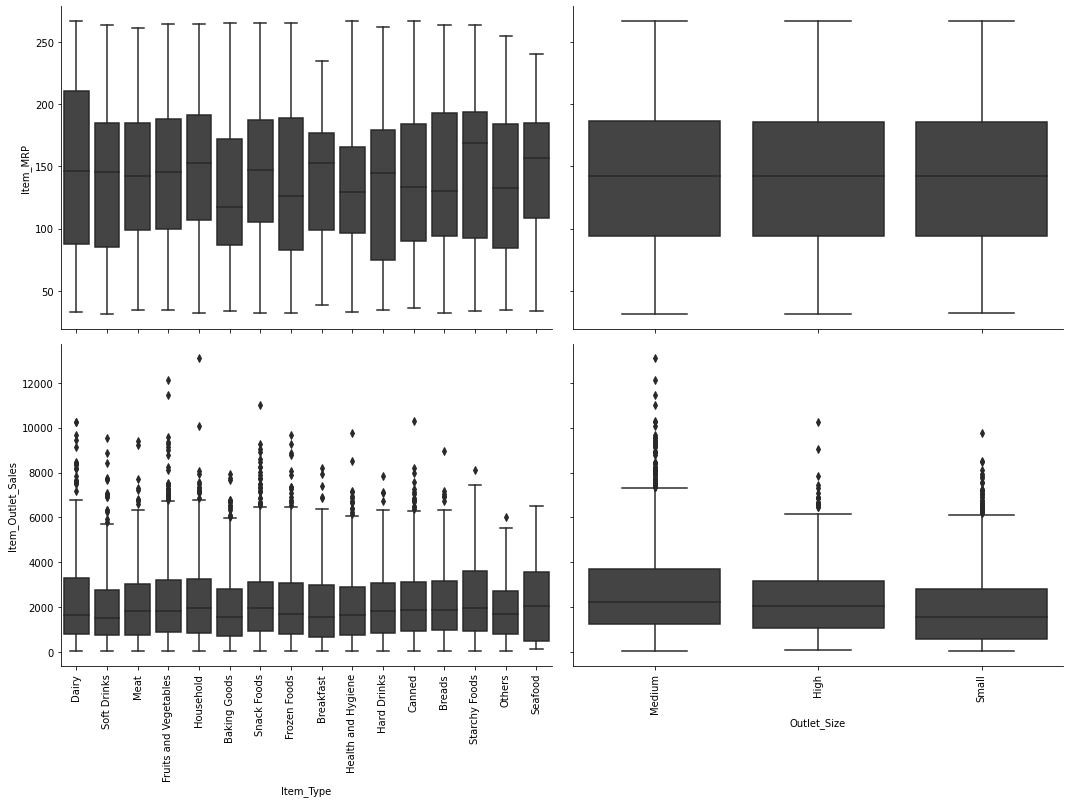

In [22]:
g = sb.PairGrid(data, y_vars = ['Item_MRP','Item_Outlet_Sales'], x_vars = ['Item_Type','Outlet_Size'], height = 5, aspect = 1.5)
g.map(sb.boxplot,color='#444444')

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

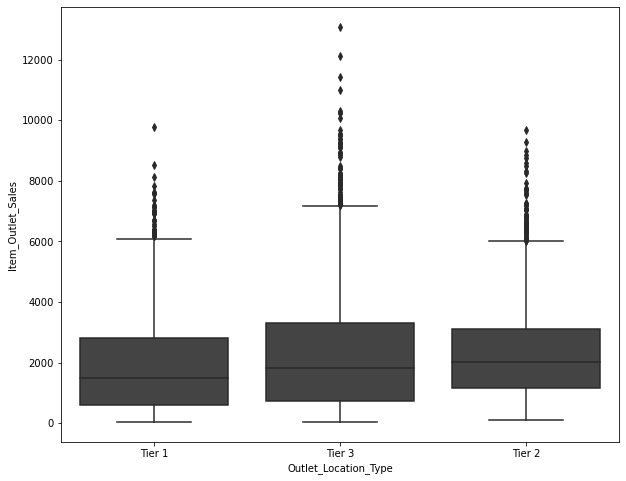

In [23]:
plt.figure(figsize=(10,8))
sb.boxplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',data=data, color = '#444444')

<AxesSubplot:>

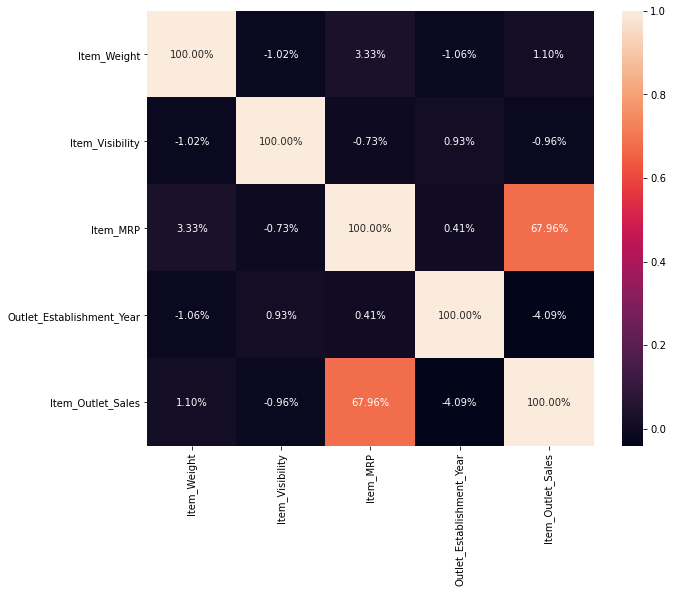

In [24]:
corrs=data.dropna().corr()
plt.figure(figsize=(10,8))
sb.heatmap(corrs,annot=True,fmt='.2%')

<a id='m'></a>
## Missing Value Treatment

In [25]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

There are a lot of missing values in weight and size features. Weight is a continuous feature. Hence, we will treat it by grouping the data by the item identifier and finding its weight mean. For size feature, We will do the same thing but we will look for the mode.

In [26]:
def fast_mode(df, key_cols, value_col):
    """ 
    Calculate a column mode, by group, ignoring null values. 

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame over which to calcualate the mode. 
    key_cols : list of str
        Columns to groupby for calculation of mode.
    value_col : str
        Column for which to calculate the mode. 

    Return
    ------ 
    pandas.DataFrame
        rows for the mode of value_col per key_cols group. If ties, 
        returns the one which is sorted first. 
    """
    return (df.groupby(key_cols + value_col).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [27]:
group = ['Item_Identifier']
mode = fast_mode(data, group, ['Outlet_Size']).set_index(group)

In [28]:
def fillMode(row):
    try:
        if math.isnan(row['Outlet_Size']):
            row['Outlet_Size']=mode.loc[row['Item_Identifier']][0]
    except:pass
    return row
data=data.apply(fillMode,axis=1)
data['Outlet_Size'].isnull().sum()

0

In [29]:
means = data.groupby('Item_Identifier').Item_Weight.mean()

In [30]:
def fillMean(row):
    try:
        if math.isnan(row['Item_Weight']):
            row['Item_Weight']=means.loc[row['Item_Identifier']]
    except:pass
    return row
data=data.apply(fillMean,axis=1)
data['Item_Weight'].isnull().sum()

0

<a id='o'></a>
## Outliers Removal

In [31]:
def check_outliers (df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    q_lower_bound=df[features][(df[features])<lower_bound].count()
    q_upper_bound=df[features][(df[features])>upper_bound].count()
    return lower_bound,upper_bound

def remove_outliers (df, features, lower, upper):
    df = df[(df[features]<=upper)]
    df = df[(df[features]>=lower)]
    return df

In [32]:
for i in ['Item_MRP','Item_Weight','Item_Visibility']:
    lower , upper = check_outliers(data,i)
    data = remove_outliers(data, i, lower, upper)

In [33]:
data.shape

(13943, 13)

<a id='f'></a>
## Feature Engineering

### Features Tranformation

Here we are going to apply transformations to certain continous features in the data in order to meake them more normally distributed. This will help the model.

1. Sales

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


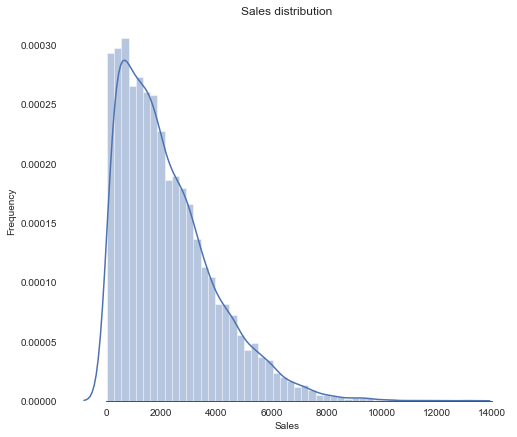

In [34]:
sb.set_style("white")
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Item_Outlet_Sales'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="Sales distribution")
sb.despine(trim=True, left=True)
plt.show()

In [35]:
# Skew and kurt
print("Skewness: %f" % data['Item_Outlet_Sales'].skew())
print("Kurtosis: %f" % data['Item_Outlet_Sales'].kurt())

Skewness: 1.170912
Kurtosis: 1.613675


In [36]:
# Square root transformation – sqrt(x) 
data['Sqrt_Sales'] = data.Item_Outlet_Sales**(1/2)

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


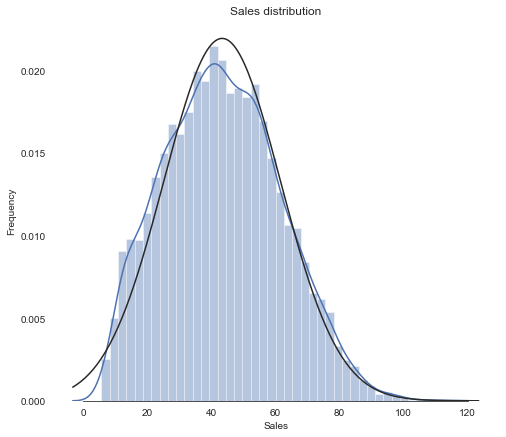

In [37]:
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Sqrt_Sales'] , fit=norm, color="b");

# Get the fitted parameters used by the function
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="Sales distribution")
sb.despine(trim=True, left=True)

plt.show()

2. Item_Weight

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


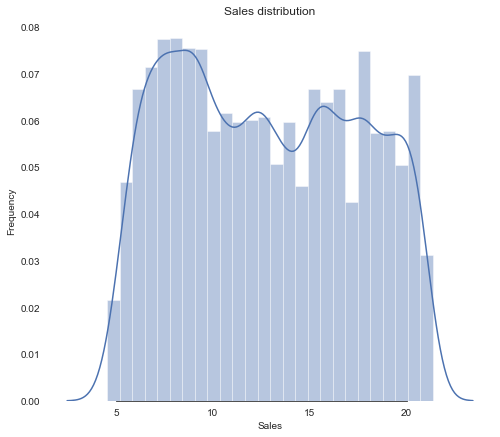

Skewness: 0.099016
Kurtosis: -1.227968


In [38]:
sb.set_style("white")
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Item_Weight'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="Sales distribution")
sb.despine(trim=True, left=True)
plt.show()
# Skew and kurt
print("Skewness: %f" % data['Item_Weight'].skew())
print("Kurtosis: %f" % data['Item_Weight'].kurt())

In [39]:
# Exp transformation
data['Item_Weight'] = data.Item_Weight**(1/1.2)

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


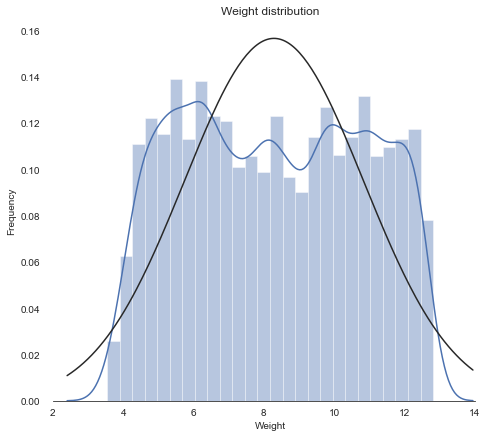

In [40]:
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Item_Weight'] , fit=norm, color="b");

# Get the fitted parameters used by the function
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Weight")
ax.set(title="Weight distribution")
sb.despine(trim=True, left=True)

plt.show()

We will choose :- 'Item_Weight_exp', 'Item_Visibility_sqaure', 'Item_MRP_exp', 'Item_Outlet_Sales_sqaure', 'How_old_Outlet_sqaure'

3. Item_Visibility

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


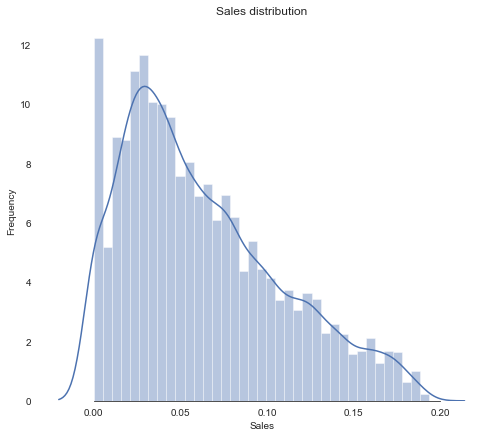

Skewness: 0.730801
Kurtosis: -0.248291


In [41]:
sb.set_style("white")
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Item_Visibility'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="Sales distribution")
sb.despine(trim=True, left=True)
plt.show()
# Skew and kurt
print("Skewness: %f" % data['Item_Visibility'].skew())
print("Kurtosis: %f" % data['Item_Visibility'].kurt())

In [42]:
# Exp transformation
data['Item_Visibility'] = (data.Item_Visibility+0.001)**(1/2)

C:\Users\C\conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


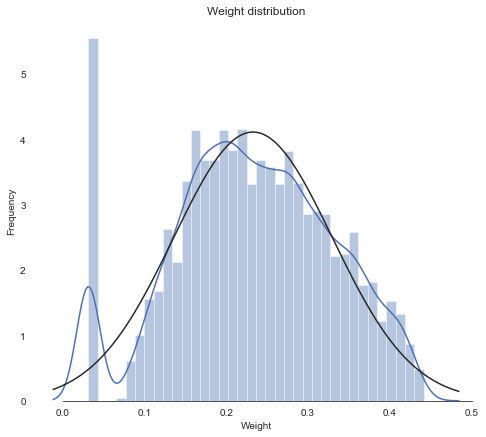

In [43]:
sb.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sb.distplot(data['Item_Visibility'] , fit=norm, color="b");

# Get the fitted parameters used by the function
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Weight")
ax.set(title="Weight distribution")
sb.despine(trim=True, left=True)

plt.show()

### Adding Features

There are 4 clusters in the Item_MRP feature. I'll categorize them into a new feature

In [44]:
def binn(x):
    if x<75: return 0
    elif x<145: return 1
    elif x<200: return 2
    else: return 3
data['Item_MRP_Bin_qcut'] = data['Item_MRP'].apply(binn)
data[['Item_MRP', 'Item_MRP_Bin_qcut']].head()

,Item_MRP,Item_MRP_Bin_qcut
0,249.8092,3
1,48.2692,0
2,141.6180,1
3,182.0950,2
4,53.8614,0


Item_Identifier has a lot of values. Encoding them will cause dimentionality curse. To solve this, I'll code them by the first three letters then I'll Frequency code them into a new feature.

In [45]:
data['Item_Code'] = data['Item_Identifier'].apply(lambda x: x[0:3])
data[['Item_Identifier', 'Item_Code']].head()

,Item_Identifier,Item_Code
0,FDA15,FDA
1,DRC01,DRC
2,FDN15,FDN
3,FDX07,FDX
4,NCD19,NCD


In [46]:
# Frequency encoding using value_counts function 
Item_Code_freq = data['Item_Code'].value_counts(normalize=True)

# Mapping the encoded values with original data 
data['Item_Code_freq'] = data['Item_Code'].apply(lambda x : Item_Code_freq[x])

print('The sum of Item_Code_freq variable:', sum(Item_Code_freq))
data[['Item_Code', 'Item_Code_freq']].head(6)

The sum of Item_Code_freq variable: 1.0000000000000002


,Item_Code,Item_Code_freq
0,FDA,0.029047
1,DRC,0.005236
2,FDN,0.024098
3,FDX,0.032776
4,NCD,0.006383
5,FDP,0.027397


I'll add another feature that averages the sales of each item type & id

In [47]:
data['Item_Outlet_Sales_Mean'] = data.groupby(['Item_Identifier', 'Item_Type'])['Sqrt_Sales']\
                                     .transform(lambda x: x.mean())

data[['Item_Identifier','Item_Type','Item_Outlet_Sales','Item_Outlet_Sales_Mean']].tail()


,Item_Identifier,Item_Type,Item_Outlet_Sales,Item_Outlet_Sales_Mean
14199,FDB58,Snack Foods,NaN,43.888017
14200,FDD47,Starchy Foods,NaN,60.369285
14201,NCO17,Health and Hygiene,NaN,43.613733
14202,FDJ26,Canned,NaN,50.848006
14203,FDU37,Canned,NaN,44.363552


<a id='e'></a>
## Encoding

Outlet_Size

In [48]:
label_encoder = preprocessing.LabelEncoder()
data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])

In [49]:
data['Outlet_Size'].unique()

array([1, 0, 2])

One-Hot-Encoding 

In [50]:
data = pd.get_dummies(data=data, columns=['Outlet_Type','Item_Fat_Content','Outlet_Identifier','Item_Type','Outlet_Location_Type'], drop_first=True)

In [51]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,source,Sqrt_Sales,Item_MRP_Bin_qcut,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,6.413116,0.130565,249.8092,1999,1,3735.1380,train,61.115775,3,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,4.401507,0.142402,48.2692,2009,1,443.4228,train,21.057607,0,...,0,0,0,0,0,0,1,0,0,1
2,FDN15,10.860881,0.133267,141.6180,1999,1,2097.2700,train,45.795961,1,...,0,0,1,0,0,0,0,0,0,0
3,FDX07,11.733233,0.031623,182.0950,1998,1,732.3800,train,27.062520,2,...,0,0,0,0,0,0,0,0,0,1
4,NCD19,6.199779,0.031623,53.8614,1987,0,994.7052,train,31.538947,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,7.095632,0.120401,141.3154,1997,2,NaN,test,NaN,1,...,0,0,0,0,0,1,0,0,0,0
14200,FDD47,5.420150,0.379461,169.1448,2009,1,NaN,test,NaN,2,...,0,0,0,0,0,0,0,1,0,1
14201,NCO17,6.812921,0.272999,118.7440,2002,1,NaN,test,NaN,1,...,1,0,0,0,0,0,0,0,1,0
14202,FDJ26,9.710528,0.031623,214.6218,2007,2,NaN,test,NaN,3,...,0,0,0,0,0,0,0,0,1,0


<a id='s'></a>
## Scaling

In [52]:
data.drop(columns = ['Item_Identifier','Item_Outlet_Sales','Item_Code'],inplace=True)

In [53]:
# Separate target from predictors
y = data[['Sqrt_Sales','source']]
X = data.drop(['Sqrt_Sales','source'], axis=1)
ss = RobustScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [54]:
data = df_scaled 
data[['Sqrt_Sales','source']] = y
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_MRP_Bin_qcut,Item_Code_freq,Item_Outlet_Sales_Mean,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Sqrt_Sales,source
0,-0.419788,-0.737045,1.171129,0.000000,0.0,2.0,0.177258,1.453640,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.115775,train
1,-0.877040,-0.650828,-1.023223,0.588235,0.0,-1.0,-0.933110,-0.829408,-1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.057607,train
2,0.591216,-0.717366,-0.006849,0.000000,0.0,0.0,-0.053512,-0.468787,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.795961,train
3,0.789508,-1.457757,0.433862,-0.058824,0.0,1.0,0.351171,0.543592,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.062520,train
4,-0.468281,-1.457757,-0.962335,-0.705882,-1.0,-1.0,-0.879599,-1.038699,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.538947,train


<a id='sp'></a>
## Splitting

In [55]:
# divide into train and test
train_s = data.loc[data['source']=='train']
test_s = data.loc[data['source']=='test']

# drop unnecessary columns
train_s.drop(['source'], axis=1, inplace=True)
test_s.drop(['Sqrt_Sales', 'source'], axis=1, inplace=True)

C:\Users\C\conda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
# Separate target from predictors
y = train_s.Sqrt_Sales
X = train_s.drop(['Sqrt_Sales'], axis=1)# Divide data into training and validation subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [57]:
X.shape

(8375, 38)

<a id='mo'></a>
# Modeling

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

estimator = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
selector = RFECV(estimator=estimator, cv=5)
selector = selector.fit(X_train, y_train)

### Feature Selection
We are going the best 20 feature to feed them to our model.

Feature Ranking:
 Outlet_Identifier_OUT017           37
Outlet_Identifier_OUT046           36
Outlet_Identifier_OUT045           35
Outlet_Identifier_OUT013           34
Outlet_Identifier_OUT018           33
Item_Type_Breads                   32
Item_Type_Household                31
Outlet_Type_Supermarket Type3      30
Item_Type_Health and Hygiene       29
Outlet_Type_Supermarket Type2      28
Item_Type_Hard Drinks              27
Outlet_Type_Supermarket Type1      26
Item_Type_Fruits and Vegetables    25
Item_Type_Starchy Foods            24
Outlet_Identifier_OUT035           23
Item_Type_Soft Drinks              22
Outlet_Identifier_OUT027           21
Item_Type_Snack Foods              20
Outlet_Identifier_OUT019           19
Item_Type_Seafood                  18
Item_Type_Others                   17
Item_Type_Meat                     16
Item_MRP_Bin_qcut                  15
Item_Type_Breakfast                14
Item_Type_Canned                   13
Item_Type_Dairy                 

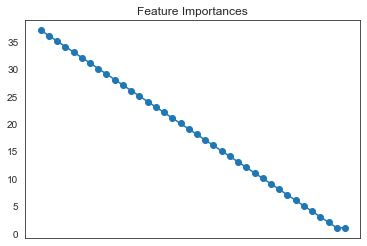

In [59]:
# visualise result
coefs = pd.Series(selector.ranking_, X_train.columns).sort_values(ascending=False)
ax=coefs.plot(title='Feature Importances', marker='o', rot=90)
ax.axes.get_xaxis().set_visible(False)
print("Feature Ranking:\n %s"% coefs)

In [60]:
features = list(coefs.index[:20])
not_features = list(coefs.index[20:])

In [61]:
X = X[features]
test = test_s[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [62]:
def error(true, pred):
    print('RMSE: ', np.sqrt(mean_squared_error(true, pred)))
    print('MAE: ', mean_absolute_error(true, pred))
    
def visualize(true,pred):
    plt.figure(figsize=(20, 7))
    ax = sb.kdeplot(true, color="r", label="Actual Value")
    sb.kdeplot(pred, color="b", label="Fitted Values" , ax=ax)
    plt.title('Actual vs Fitted Values for Price')
    plt.legend()
    plt.show()
    plt.close()

## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
reg_preds = reg_lin.predict(X_test)
error(y_test**2,reg_preds**2)

RMSE:  1711.21959892358
MAE:  1275.8606868678662


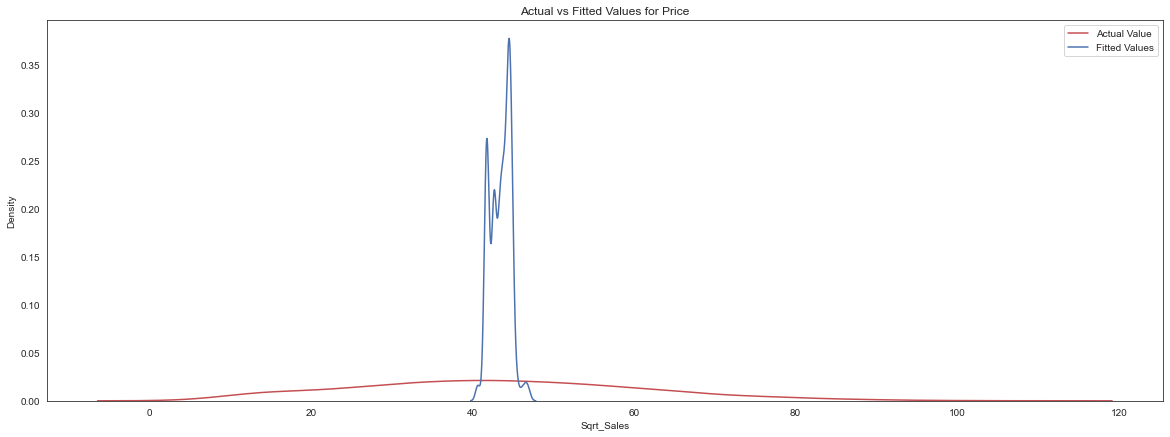

In [64]:
visualize(y_test,reg_preds)

## Ridge Regression

In [65]:
from sklearn.linear_model import RidgeCV

reg_rid=RidgeCV(cv=10)
reg_rid.fit(X_train,y_train)
reg_rid_preds = reg_rid.predict(X_test)
error(y_test**2,reg_rid_preds**2)

RMSE:  1711.1096885413306
MAE:  1275.7287190067611


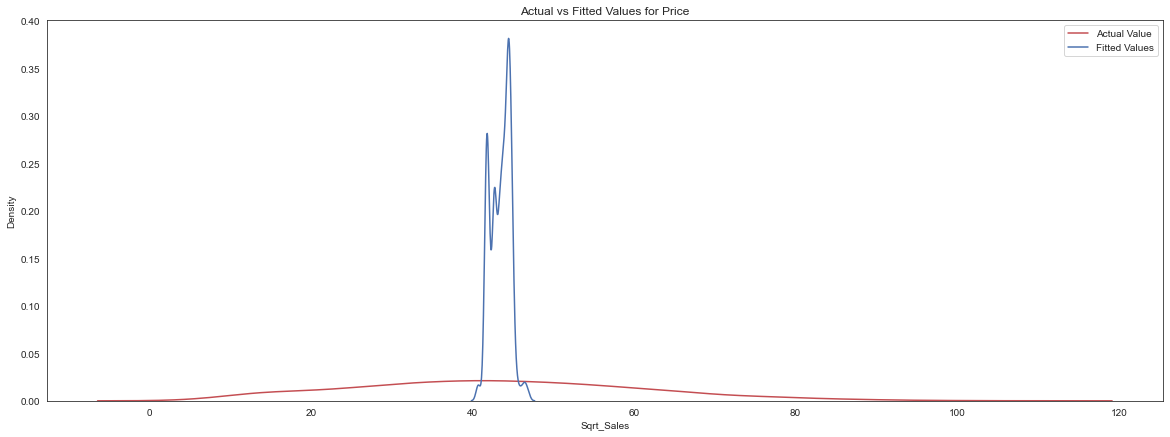

In [66]:
visualize(y_test,reg_rid_preds)

## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

reg_las=Lasso()
reg_las.fit(X_train,y_train)
reg_las_preds = reg_las.predict(X_test)
error(y_test**2,reg_las_preds**2)

RMSE:  1706.839454357763
MAE:  1272.5707754163175


## Random Forrest

In [68]:
rf = RandomForestRegressor(n_estimators=200,
                           max_depth=5,
                           random_state=42)
# Preprocessing of training data, fit model 
rf.fit(X_train, y_train)
# Preprocessing of validation data, get predictions
rf_preds = rf.predict(X_test)
# Evaluate the model
error(y_test**2,rf_preds**2)

RMSE:  1710.9329325003548
MAE:  1278.4033375672295


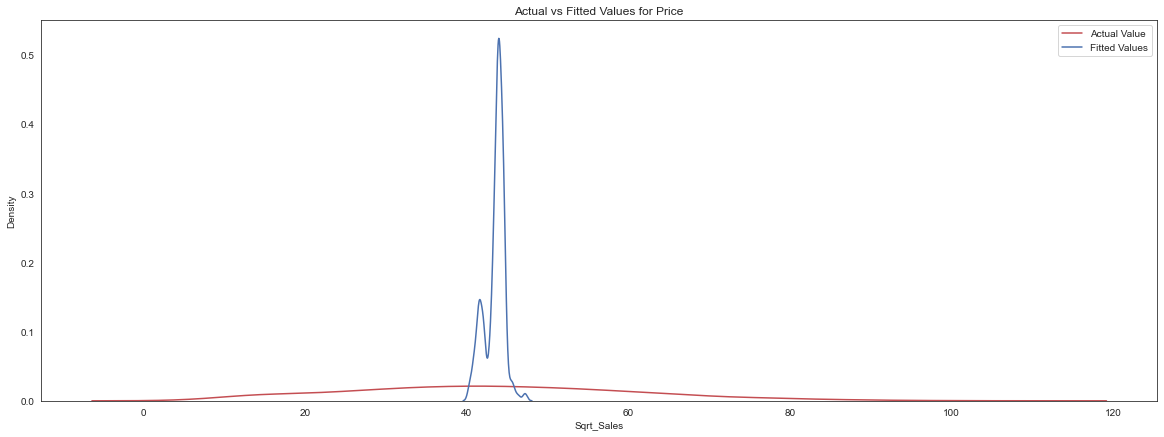

In [69]:
visualize(y_test,rf_preds)

## XGB

In [70]:
xgboost = XGBRegressor()
# Preprocessing of training data, fit model 
xgboost.fit(X_train, y_train)
# Preprocessing of validation data, get predictions
xgboost_preds = xgboost.predict(X_test)
# Evaluate the model
error(y_test**2,xgboost_preds**2)

RMSE:  1719.1072492326564
MAE:  1285.396714632696


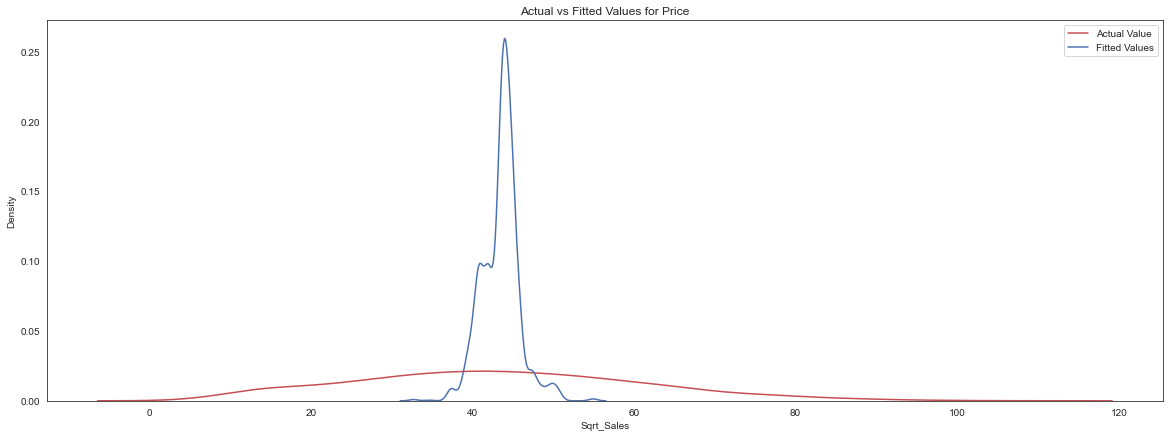

In [71]:
visualize(y_test,xgboost_preds)

## GradientBoostingRegressor

In [72]:
gbr = GradientBoostingRegressor(random_state=42,
                               subsample = 1,
                               n_estimators=500,
                               max_depth = 6) 
gbr.fit(X_train, y_train)
# Preprocessing of validation data, get predictions
gbr_preds = gbr.predict(X_test)
# Evaluate the model
error(y_test**2,gbr_preds**2)

RMSE:  1719.2762487487746
MAE:  1285.6019673239364


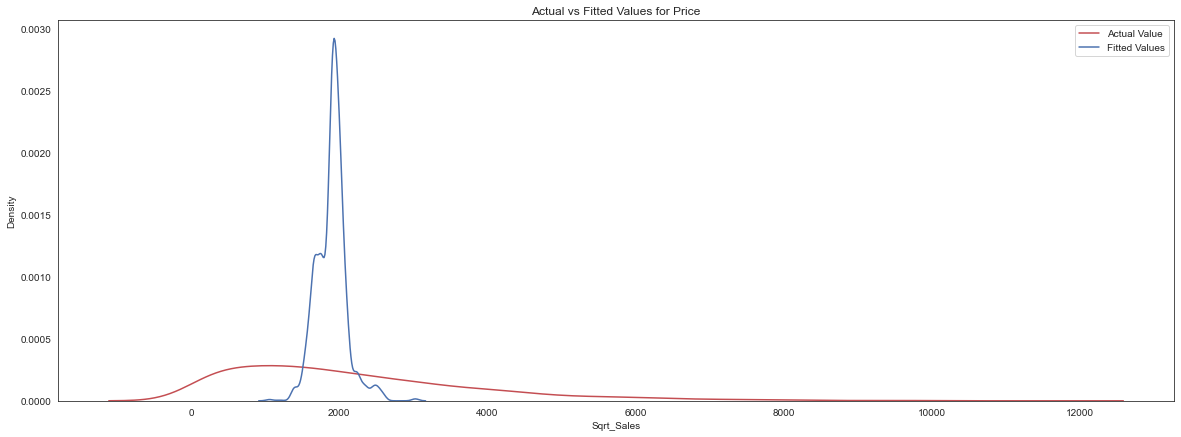

In [73]:
visualize(y_test**2,gbr_preds**2)

## Test Model

In [80]:
Test_Predictions = pd.DataFrame(rf.predict(test)**2)
Test_Predictions.columns = ['Item_Outlet_Sales']

In [81]:
Test_Predictions.to_csv('Test_Output')